In [1]:
import pandas as pd
import numpy as np
from keybert import KeyBERT
import re
import nltk
from tqdm import tqdm

from keyphrase_vectorizers import KeyphraseCountVectorizer


In [33]:
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [34]:
stemmer = nltk.stem.PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [123]:
def text_filtering(text):
    text = str(text).lower()
    # remove new lines and tabs
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\t', ' ', text)
    # strip the text
    text = text.strip()
    filtered_sentence = [w for w in word_tokenize(text) if not w in stopwords.words('english')] # remove stopwords
    # stem the words
    filtered_sentence = [stemmer.stem(w) for w in filtered_sentence]
    # back to string from list
    filtered_sentence = ' '.join(filtered_sentence)

    return filtered_sentence   

In [2]:
df = pd.read_csv('commen_sense.csv')

In [147]:
df['filtered_text'] = df['Review'].apply(text_filtering)

In [154]:
df.to_csv('commen_sense.csv', encoding='utf-8', index=False)

In [3]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

In [4]:
def keybert_extract(text):
    text = str(text)
    try:
        results = kw_model.extract_keywords(docs=text, vectorizer=KeyphraseCountVectorizer(),top_n=10, stop_words='english')
        words = []
        for result in results:
            words.append(result[0])
    except:
        words = []
    return words

In [6]:
tqdm.pandas()
df['keybert'] = df['review'].progress_apply(keybert_extract)

100%|██████████| 6350/6350 [32:01<00:00,  3.31it/s]


In [7]:
df.to_csv('commen_sense.csv', encoding='utf-8', index=False)

In [ ]:
df

In [91]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add('play')
stopwords.add('game')
stopwords.add('roblox')
stopwords.add('roblux')
stopwords.add('robux')
stopwords.add('games')
stopwords.add('people')
stopwords.add('kid')
stopwords.add('child')
stopwords.add('parent')
stopwords.add('account')
stopwords.add('age')
stopwords.add('son')
stopwords.add('daughter')

def word_cloud(corpus):
    comment_words = '' 

    for val in corpus:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            # convert each token into lowercase
            tokens[i] = tokens[i].lower()
            # remove signs
            tokens[i] = re.sub(r'[^\w\s]', '', tokens[i])
            # remove single characters
            tokens[i] = re.sub(r'\s+[a-zA-Z]\s+', '', tokens[i])
            # stem the words
            tokens[i] = lemmatizer.lemmatize(tokens[i])
            

            # remove if the token is a stopword
            if not tokens[i] in stopwords:
                comment_words += tokens[i]+" "            
        # comment_words += " ".join(tokens)+" "
    return comment_words

def draw_word_cloud(comment_words):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

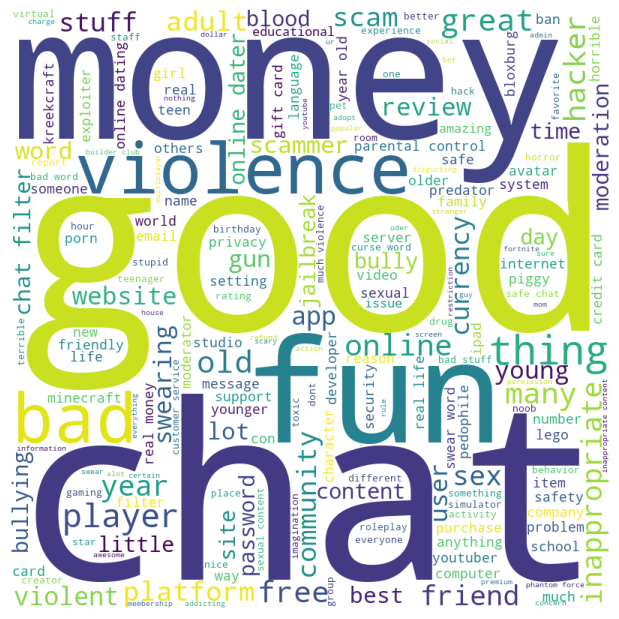

In [92]:
parent_wc = word_cloud(df[df['author']=='adult']['keybert'])
draw_word_cloud(parent_wc)

In [98]:
# print the top 50 most frequent words in the word cloud
print("Top 50 most frequent words from parent comments: ")
top_50_parent = pd.Series(parent_wc.split()).value_counts()[:50]
print(top_50_parent)

Top 50 most frequent words from parent comments: 
chat             245
online           181
good             170
money            168
bad              163
old              146
fun              143
violence         138
year             129
inappropriate    128
thing            125
player           119
word             112
great             99
stuff             95
hacker            95
free              91
friend            90
many              90
content           89
card              82
adult             79
scam              75
sex               75
filter            73
platform          72
real              72
community         72
currency          68
review            68
app               66
swearing          66
violent           61
moderation        60
much              60
user              60
website           58
young             56
safe              56
sexual            55
scammer           53
gun               53
privacy           51
parental          51
lot               50
contr

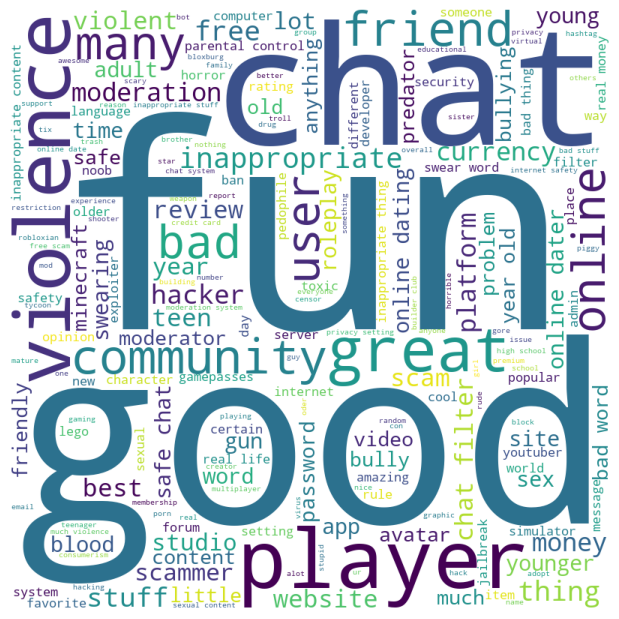

In [94]:
child_wc = word_cloud(df[df['author']=='child']['keybert'])
draw_word_cloud(child_wc)

In [90]:
# print the top 50 most frequent words in the word cloud
print("Top 50 most frequent words from child comments: ")
top_50_child = pd.Series(child_wc.split()).value_counts()[:50]
print(top_50_child)

Top 50 most frequent words from child comments: 
chat             838
online           598
age              570
fun              527
bad              507
good             476
inappropriate    464
player           462
violence         412
thing            407
word             337
stuff            333
great            328
friend           327
free             307
community        307
moderation       305
money            295
scam             294
many             279
filter           267
platform         266
user             265
hacker           263
year             250
content          249
currency         224
safe             222
review           205
old              194
teen             184
website          178
system           176
violent          176
lot              171
best             168
real             161
scammer          159
swearing         151
studio           151
much             142
younger          140
adult            136
sex              133
daters           132
safety

In [10]:
kw_model.extract_keywords(text, highlight=True, stop_words='english', top_n=20)

played this game with my daughter and there were topless lego men This game is SO rude saw people replacing the 
word with hitttt They also perform sexy on my year old daughter and make her cry cannot believe how much profanity 
this game has am fuming 11

[('lego', 0.4223),
 ('topless', 0.3741),
 ('profanity', 0.3126),
 ('rude', 0.2972),
 ('game', 0.2777),
 ('fuming', 0.2652),
 ('word', 0.2475),
 ('hitttt', 0.2373),
 ('men', 0.2244),
 ('daughter', 0.2109),
 ('played', 0.1988),
 ('people', 0.1618),
 ('old', 0.1436),
 ('saw', 0.1425),
 ('sexy', 0.1362),
 ('11', 0.1075),
 ('make', 0.1024),
 ('replacing', 0.0904),
 ('believe', 0.09),
 ('year', 0.0278)]

Emotioan Extraction

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

In [60]:
def get_emotion(text):
    text = str(text)
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    logits = output.logits
    label = logits.argmax()
    label = label.item()
    predicted_class = model.config.id2label[label]
    return predicted_class

In [64]:
tqdm.pandas()
df['emotion'] = df['review'].progress_apply(get_emotion)

100%|██████████| 6350/6350 [10:28<00:00, 10.10it/s]


In [63]:
df.to_csv('commen_sense.csv', encoding='utf-8', index=False)

In [66]:
df.groupby(['author','emotion']).count()

rate  title  review  filtered_text   age  keybert
author emotion                                                          
adult  admiration       278    263     278            278   278      278
       amusement         25     24      25             25    25       25
       anger             33     32      33             33    33       33
       annoyance        108    106     108            108   108      108
       approval         207    204     207            207   207      207
       caring            34     34      34             34    34       34
       confusion          8      8       8              8     8        8
       curiosity          6      6       6              6     6        6
       desire            12     10      12             12    12       12
       disappointment    55     54      55             55    55       55
       disapproval       99     94      99             99    99       99
       disgust           34     33      34             34    34       34
       excitement         2      1       2              2     2        2
       fear              40     39      40             40    40       40
       gratitude         26     25      26             26    26       26
       joy              125    120     125            125   125      125
       love              59     55      59             59    59       59
       nervousness        1      1       1              1     1        1
       neutral          656    634     655            655   656      656
       optimism          14     14      14             14    14       14
       realization        8      8       8              8     8        8
       remorse            8      7       8              8     8        8
       sadness           25     25      25             25    25       25
       surprise           7      6       7              7     7        7
child  admiration       790    758     790            790   790      790
       amusement         91     87      91             91    91       91
       anger             32     31      32             32    32       32
       annoyance        259    247     259            259   259      259
       approval         680    670     680            680   680      680
       caring           120    119     120            120   120      120
       confusion         28     26      28             28    28       28
       curiosity          9      8       9              9     9        9
       desire            14     13      14             14    14       14
       disappointment    88     85      88             88    88       88
       disapproval      215    211     215            215   215      215
       disgust           51     47      51             51    51       51
       embarrassment      1      1       1              1     1        1
       excitement         6      6       6              6     6        6
       fear              28     26      28             28    28       28
       gratitude         81     81      81             81    81       81
       joy              432    421     432            432   432      432
       love             207    197     207            207   207      207
       nervousness        2      2       2              2     2        2
       neutral         1232   1201    1232           1230  1232     1232
       optimism          60     60      60             60    60       60
       realization        8      8       8              8     8        8
       remorse           12     12      12             12    12       12
       sadness           34     34      34             34    34       34

Sentiment Analysis

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

sent_tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sent_model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
text = "I love you"
encoded_input = sent_tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
output = sent_model(**encoded_input)
logits = output.logits
label = logits.argmax()
label = label.item()
predicted_class = sent_model.config.id2label[label]
print(predicted_class)

In [95]:
def get_sentiment(text):
    text = str(text)
    encoded_input = sent_tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = sent_model(**encoded_input)
    logits = output.logits
    label = logits.argmax()
    label = label.item()
    predicted_class = sent_model.config.id2label[label]
    return predicted_class

In [ ]:
tqdm.pandas()
df['sentiment'] = df['review'].progress_apply(get_sentiment)

In [85]:
df.to_csv('commen_sense.csv', encoding='utf-8', index=False)

In [74]:
df_parent = df[df['author']=='adult']
df_child = df[df['author']=='child']

In [75]:
df_parent.groupby(['sentiment','emotion']).count()

author  rate  title  review  filtered_text  age  \
sentiment emotion                                                           
negative  admiration           9     9      9       9              9    9   
          amusement            3     3      3       3              3    3   
          anger               22    22     22      22             22   22   
          annoyance           65    65     63      65             65   65   
          approval            17    17     17      17             17   17   
          caring               7     7      7       7              7    7   
          confusion            3     3      3       3              3    3   
          curiosity            1     1      1       1              1    1   
          desire               1     1      1       1              1    1   
          disappointment      37    37     37      37             37   37   
          disapproval         37    37     37      37             37   37   
          disgust             21    21     20      21             21   21   
          excitement           2     2      1       2              2    2   
          fear                26    26     25      26             26   26   
          gratitude            4     4      4       4              4    4   
          joy                  4     4      4       4              4    4   
          love                 1     1      1       1              1    1   
          nervousness          1     1      1       1              1    1   
          neutral            119   119    116     119            119  119   
          optimism             1     1      1       1              1    1   
          realization          3     3      3       3              3    3   
          remorse              1     1      1       1              1    1   
          sadness             14    14     14      14             14   14   
          surprise             1     1      0       1              1    1   
neutral   admiration         263   263    249     263            263  263   
          amusement           22    22     21      22             22   22   
          anger               11    11     10      11             11   11   
          annoyance           43    43     43      43             43   43   
          approval           190   190    187     190            190  190   
          caring              26    26     26      26             26   26   
          confusion            5     5      5       5              5    5   
          curiosity            5     5      5       5              5    5   
          desire              10    10      8      10             10   10   
          disappointment      18    18     17      18             18   18   
          disapproval         62    62     57      62             62   62   
          disgust             13    13     13      13             13   13   
          fear                14    14     14      14             14   14   
          gratitude           21    21     20      21             21   21   
          joy                121   121    116     121            121  121   
          love                58    58     54      58             58   58   
          neutral            536   536    517     535            535  536   
          optimism            13    13     13      13             13   13   
          realization          5     5      5       5              5    5   
          remorse              7     7      6       7              7    7   
          sadness             11    11     11      11             11   11   
          surprise             6     6      6       6              6    6   
positive  admiration           6     6      5       6              6    6   
          caring               1     1      1       1              1    1   
          desire               1     1      1       1              1    1   
          gratitude            1     1      1       1              1    1   
          neutral     

In [97]:
# find the top 5 most frequent emotions in the parent comments
top_10_parent = pd.Series(df_parent['emotion']).value_counts()[:20]
print(top_10_parent)

emotion
neutral           656
admiration        278
approval          207
joy               125
annoyance         108
disapproval        99
love               59
disappointment     55
fear               40
caring             34
disgust            34
anger              33
gratitude          26
amusement          25
sadness            25
optimism           14
desire             12
realization         8
remorse             8
confusion           8
Name: count, dtype: int64


In [96]:
top_10_child = pd.Series(df_child['emotion']).value_counts()[:20]
print(top_10_child)

emotion
neutral           1232
admiration         790
approval           680
joy                432
annoyance          259
disapproval        215
love               207
caring             120
amusement           91
disappointment      88
gratitude           81
optimism            60
disgust             51
sadness             34
anger               32
fear                28
confusion           28
desire              14
remorse             12
curiosity            9
Name: count, dtype: int64


Concerning emotion based analysis
    - The top 5~10 negative emotions
    - The issues mentioned among these emotions
    - Go in deep the activities
    - topic modeling (Song's KDD paper)

Filtering --> modeling (Topic Modeling)

Filtering:
- keywords
- emotions
- games
    - safe
    - unsafe

3 RQs: emotions; activities; games

What do the parents want? sesurity features?